In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('AB_NYC_2019.csv')

In [31]:
df.head() ## Loading Data 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private Room,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire Home/Apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private Room,150,3,0,2019-06-23,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire Home/Apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire Home/Apt,80,10,9,2018-11-19,0.100000,1,0


In [4]:
df.shape

(48895, 16)

In [5]:
df.duplicated().sum() ## Checking duplicates

0

In [6]:
df.isnull().sum() ## Checking Null values

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Missing Data Handling:

In [8]:
round(df.isnull().sum()/df.shape[0]*100,2)

id                                 0.00
name                               0.03
host_id                            0.00
host_name                          0.04
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
last_review                       20.56
reviews_per_month                 20.56
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64

In [9]:
df['last_review'].fillna(df['last_review'].mode()[0], inplace=True)

In [10]:
df['last_review'].isnull().sum()

0

In [11]:
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(), inplace=True)

In [13]:
df.dropna(inplace=True)

### Duplicate Removal

In [15]:
df.duplicated().sum()

0

## Standardization

In [22]:
df['last_review']=pd.to_datetime(df['last_review'])

In [26]:
df['room_type'] = df['room_type'].str.title()

### Statistical summary

In [39]:
numeric_col = df.select_dtypes(include="number").iloc[:,2:]

In [40]:
numeric_col.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,40.728941,-73.952170,152.740309,7.012444,23.273098,1.373228,7.148369,112.801425
std,0.054528,0.046159,240.232386,20.019757,44.549898,1.497816,32.964600,131.610962
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690090,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.220000,1.000000,45.000000
75%,40.763107,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [42]:
data= pd.DataFrame()
for col in numeric_col:
    data.loc[col, "Mean"] = df[col].mean()
    data.loc[col, "Median"] = df[col].median()
    data.loc[col, "Mode"] = df[col].mode()[0] 
    data.loc[col, "Std"] = df[col].std()
data

,Mean,Median,Mode,Std
latitude,40.728941,40.72307,40.718130,0.054528
longitude,-73.952170,-73.95568,-73.956770,0.046159
price,152.740309,106.00000,100.000000,240.232386
minimum_nights,7.012444,3.00000,1.000000,20.019757
number_of_reviews,23.273098,5.00000,0.000000,44.549898
reviews_per_month,1.373228,1.22000,1.373221,1.497816
calculated_host_listings_count,7.148369,1.00000,1.000000,32.964600
availability_365,112.801425,45.00000,0.000000,131.610962


### Outlier Detection

<Axes: xlabel='price', ylabel='Density'>

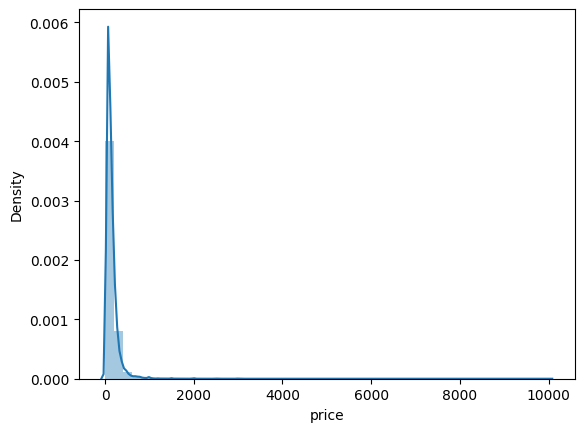

In [45]:
sns.distplot(df['price']) ## As we can see the data is highly right skeweed it means we have outliers as we can see

## Outlier handling using IQR method

In [49]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5 *IQR)

In [50]:
print(f"Outlier range : {lower_limit:.2f} - {upper_limit:.2f}")

Outlier range : -90.00 - 334.00


In [52]:
df_outliers_removed = df[(df['price'] >= lower_limit) & (df['price'] <= upper_limit)]

In [53]:
df_outliers_removed

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private Room,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire Home/Apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private Room,150,3,0,2019-06-23,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire Home/Apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire Home/Apt,80,10,9,2018-11-19,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private Room,70,2,0,2019-06-23,1.373221,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private Room,40,4,0,2019-06-23,1.373221,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire Home/Apt,115,10,0,2019-06-23,1.373221,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared Room,55,1,0,2019-06-23,1.373221,6,2


<Axes: xlabel='price', ylabel='Density'>

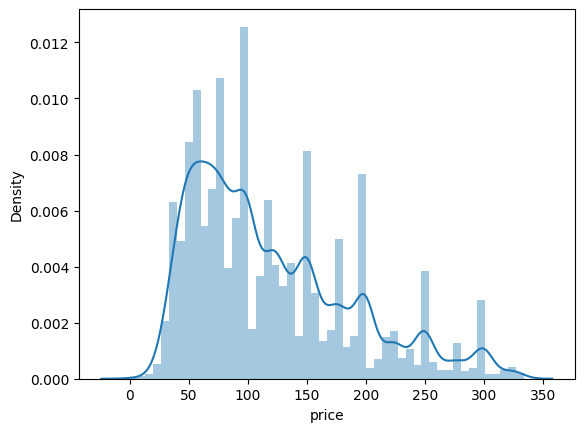

In [56]:
sns.distplot(df_outliers_removed['price'])